# Classification Trees from Start to Finish
This notebook will use __scikit-learn__ and __Cost Complexity Pruning__ to build classification Tree, which uses continuous and categorical data from the [UCI Machine Learning Library](https://archive.ics.uci.edu/ml/datasets/heart+disease) to predict whether a patient has a heart disease. 

__Classification Trees__ are an exceptionally useful machine learning method when you need to know how certain decisions are being made.

Table of Contents:
1. Import Modules
2. Import Data
3. Missing Data
4. Formatting Data
5. Building Preliminary Decision Tree
6. Cost Complexity Pruning

## 1. Import Modules
Load the necessary tools for data manipulation, data visualization, and machine learning.

In [1]:
# pip install --upgrade scikit-learn

In [2]:
import pandas as pd # to load and manipulate data and for one-hot encoding
import numpy as np # to convert data into vectors, compute with them
import matplotlib.pyplot as plt # to draw graphs
import sklearn # the machine learning library 
from sklearn.tree import DecisionTreeClassifier # to build the classification tree
from sklearn.tree import plot_tree # to draw the the classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw

In [3]:
print(sklearn.__version__)

0.23.2


## 2. Import Data
The dataset comes from the UCI Machine Learning Library and specifically is going to be the __Cleveland Heart Disease Dataset__. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and variety of other metrics.

Load the dataset into a __Pandas dataframe:__ 

In [4]:
df= pd.read_csv('processed.cleveland.data',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Pandas `.shape` command will obtain the number of rows and columns of the given dataframe.

In [6]:
df.shape

(303, 14)

Instead of names, the columns the columns are labelled with numbers. Let's add the proper names of the patient features:

|Feature Name|Description|
|-----------:|-----------|
|__age__|Age in Years|
|__sex__|1=male, 0=female|
|__cp__|Chest Pain Type (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic) |
|__trestbp__|Resting Blood Pressure (in mm Hg)|
|__chol__|Serum Cholesterine in mg/dl|
|__fbs__|Fasting Blood Sugar > 120 mg/dl (1=true; 0=false)|
|__restecg__|Resting Electrocardiographic Results (0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria)|
|__thalach__|Maximum Heart Rate Achieved|
|__exang__|Exercise Induced Angine|
|__oldpeak__|ST Depression Induced by Exercise Relative to Rest|
|__slope__|Slope of the Peak Exercise ST Segment(1=upsloping, 2=flat, 3=downsloping)|
|__ca__|Number of Major Vessels (0-3) Colored by Fluoroscopy|
|__thal__|Short of Thalium Heart Scan (3=normal, 6=fixed defect, 7=reversable defect)|
|__hd__|Diagnosis fo Heart Disease|

In [7]:
df.columns=['age',
            'sex',
            'cp',
            'trestbps',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'hd']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The `.describe()` in Pandas produces summary statistics of the dataframe.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## 3. Missing Data
### Identification

The first step of the Data Preprocessing is to identify and dealing with missing data. Missing data is simply a blank space, or a surrogate value like __N/A__ that indicates that some entry is missing from the one of the features.

There are two main ways of dealing with missing data:
1. We can remove the rows that contain missing data from the dataset. This is relatively easy to do, but is wastes all of the other values that were collected.
2. We can impute the values that are missing, for instance, with a mean, median, or mode depending on the data type.

This section will focus on identifying the missing values:

In [9]:
# dtypes obtains the data types for each column 
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

Almost all are `float64`, however, two columns, __ca__ and __thal__, have `object` type and one column, __hd__ as `int64`.

In theory, both __ca__ and __thal__ should habe a numerical data type.

In [10]:
# print out the unique values in 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [11]:
# print out the unique values in 'thal'
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

The '?' was used to indicate missing data in the original dataset.

### Dealing with Missing Data
Since Sklearn Classification Trees do not support datasets with missing values, this section is about dealing with the missing data.

How many rows contain missing data?

In [12]:
len(df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')])

6

In [13]:
df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


As reminder, the dataset contains 303 rows in total.

In [14]:
len(df)

303

Since only6 out of 303 rows, or 2% contain missing values, there is enough data left for the Classification Tree, if the 6 rows are dropped rather than imputed.

In [15]:
# dropping missing data
df_no_missing= df.loc[(df['ca'] != '?')
                     &
                     (df['thal'] != '?')]

In [16]:
df_no_missing.shape

(297, 14)

Control if the process had the desired result.

In [17]:
print(df_no_missing['ca'].unique())
print(df_no_missing['thal'].unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


## 4. Formatting Data
### Split the data into Dependent and Independent Variable: X and y

The dependent variable, in conventionel notation `X` (upper case __X__), contains the columns or features used to make prediction/classification about the independent variable, in conventional notation `y` (lower case __y__), in this case, the diagnosis of heart disease.

Note: The code below uses `.copy()` to copy the data _by value_. By default, pandas uses _copy by reference_. Using `.copy()` ensures that the original data is not modified when formatted into `X` or `y`.

In [18]:
X= df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [19]:
y= df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### One-Hot Encoding
`X` contains both categorical and continuous variables. The table below shows what each type variable should be:

|Feature Name|Description|Variable Type|
|-----------:|-----------|-------------|
|__age__|Age in Years|_continuous (float)_|
|__sex__|1=male, 0=female|_categorical (dummy)_|
|__cp__|Chest Pain Type (1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic) |_categorical (dummy)_|
|__trestbp__|Resting Blood Pressure (in mm Hg)|_continuous (float)_|
|__chol__|Serum Cholesterine in mg/dl|_continuous (float)_|
|__fbs__|Fasting Blood Sugar > 120 mg/dl (1=true; 0=false)|_categorical (dummy)_|
|__restecg__|Resting Electrocardiographic Results (0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria)|_categorical (dummy)_
|__thalach__|Maximum Heart Rate Achieved|_continuous (float)_|
|__exang__|Exercise Induced Angine(0= no, 1=yes)|_categorical (dummy)_
|__oldpeak__|ST Depression Induced by Exercise Relative to Rest|_continuous (float)_|
|__slope__|Slope of the Peak Exercise ST Segment(1=upsloping, 2=flat, 3=downsloping)|_categorical (dummy)_|
|__ca__|Number of Major Vessels (0-3) Colored by Fluoroscopy|_continuous (float)_|
|__thal__|Short of Thalium Heart Scan (3=normal, 6=fixed defect, 7=reversable defect)|_categorical (dummy)_|

In [20]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

Age, trestbp, chol, and talach are all `float64`, which means they require no further formatting. All other columns, however, need to be converted into the appropriate format. This is because Sklearn Classification Trees do not natively support categorical data. In order to to use categorical data with Sklearn, it needs to be converted multiple columns with binary values (aka dummy variables). This conversion is called __One-Hot Encoding__. 

Let's look at the example of chest pain (cp) as categorical variable to elucidate. Chest pain has 4 categories: 1=typical angina, 2=atypical angina, 3=non-anginal pain, and 4=asymptomatic. If we treat these values 1,2,3,4 like continuous data, then we assume that 4 (asymptomatic) is more similar to 3 (non-anginal), than it is to 1 or 2. This means the decision tree would be more likely to cluster the patients with 4s and 3s together than patients with 4s and 1s. In contrast, if we treat these numbers like categorical data, then we treat each type of chest pain as a seperate category that is no more or less similar to any other category. The likelihood of clustering patients with 4s and 3s is the same clustering 4s and 1s. That approach is more reasonable.

In [21]:
X['cp'].unique()

array([1., 4., 3., 2.])

There are many different ways to do __One-Hot Encoding__ in Python. Two common methods are `ColumnTransformer()` from Sklearn and `get_dummies()` from Pandas. Both have merits and demerits. The `ColumnTransformer()` can create a persistent function that can validata data that you can get in the future. The downside is that `ColumnTransformer()` turns your data into an array and looses all the column names, making it harder to verify if the transformation worked as intended. By contrast, `get_dummies()` leaves your data in dataframe and retains column names, making it easier to verify if it worked as intended. However, `get_dummies()` does not have the persistent behavior that `ColumnTransformer()` has.

This notebook uses Pandas' `get_dummies()` for One-Hot Encoding. 

In [22]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [23]:
X_encoded= pd.get_dummies(X, columns=['cp',
                                    'restecg',
                                    'slope',
                                    'thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


`y` is also a categorical variable that contains the numbers 0 through 4 for different types of heart disease. For the sake of simplicity, this notebook only cares if a patient has heart disease or not, so we need to convert all numbers __>0__ to __1__.

In [24]:
y.unique()

array([0, 2, 1, 3, 4])

In [25]:
y_not_zero_index= y>0 # get the index for each non-zero value in y
y[y_not_zero_index]=1 # set each non-zero value in y to 1
y.unique() # verify that y only contains 0s and 1s

array([0, 1])

## 5. Build Preliminary Classification Tree
In machine learning, the cleaned and preprocessed dataset is split into training and testing sets for evaluation purposes. As their names suggest, the training set is used to train the model, in this case, the Classification Tree, and the testing set can be used to evaluate various accuracy metrics of the models.

In [26]:
# split the data into training and testin set
X_train, X_test, y_train, y_test= train_test_split(X_encoded, y, random_state=42)
# create a decision tree and fit the training data
clf_dt= DecisionTreeClassifier(random_state=42)
clf_dt= clf_dt.fit(X_train, y_train)

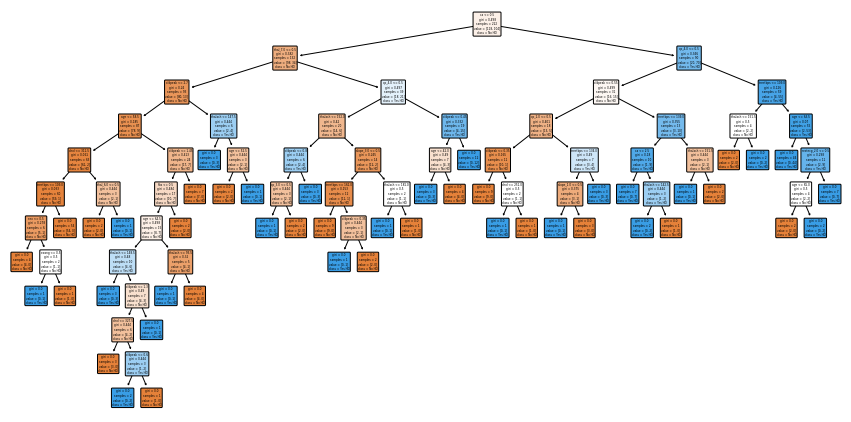

In [27]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['No HD','Yes HD'],
         feature_names=X_encoded.columns);

The performance of a Classification Tree can be visualized by a __Confusion Matrix__, which shows the true class and predicted class.

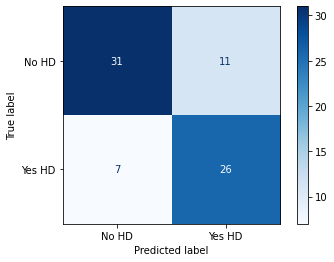

In [28]:
plot_confusion_matrix(clf_dt, # input the classification tree
                     X_test,  # input the test features
                     y_test,  # input the test target
                     display_labels=['No HD','Yes HD'], # create labels
                     cmap=plt.cm.Blues); # chose a colormap

In the confusion matrix, we see that of the __31+11=42__ people that did not have a heart disease, __31 (74%)__ were correctly classified. And of the __7+26=33__ people that have a heart disease, __26 (79%)__ were correctly predicted. 

Can this be done better and avoid overfitting? In theory, __pruning__ should solve both overfitting and give us better results.

## 6. Cost Complexity Pruning
### Visualize Alpha
Decision Trees are notorious for being overfit to the Training Data, and there are a lot of parameters (e.g.`max_depth`, `min_samples`, etc.) that are designed to reduce overfitting. However, pruning a tree with __Cost Complexity Pruning__ can simplify the whole process of finding a smaller tree that improves the accuracy with the Testing Data.

Pruning a decision tree is about finding the right value for the pruning parameter `alpha`, which controls how little or how much pruning happens. One way to find the optimal value for `alpha` is to plot the accuracy of the tree as a function of different values. Usually, this done for both Training and Testing data in one graph.

First, let's find different values of `alpha` that available for this tree and build a prunned tree for each value of `alpha`. Note to omit the maximum value of `alpha` with `ccp_alphas= ccp_alphas[:-1]` because it would prune all leaves, leaving only the root node. 

In [29]:
path= clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas= path.ccp_alphas # extract different values for alpha
ccp_alphas= ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts= [] # create array that will be put decision tree into

# create one decision tree per value for alpha and store it in array
for ccp_alpha in ccp_alphas:
    clf_dt= DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the Training and Testing Set as a function of alpha.

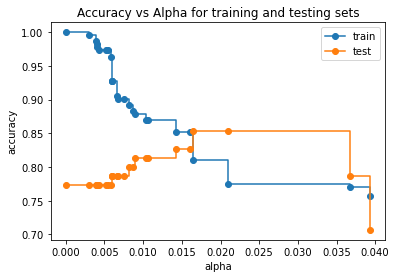

In [30]:
train_scores= [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores= [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig, ax= plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs Alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show();

The graph shows that the accuracy for the Testing Set hits its maximum `alpha` is about __0.0016__. After this value for `alpha`, the accuracy of the Training Set drops off and that suggests we should set `ccp_alpha=0.016`.

Note that when applying __Cost Complexity Pruning__ to a __Classification Tree__, value for `alpha` go from 0 to 1, because GINI scores go from 0 to 1. In contrast, values for `alpha` in a __Regression Tree__ can be much larger since the sum of squared residuals can, in theory, go from 0 to positive infitiy.

Since there are many ways we could have divided the original dataset into Training and Testing Sets, how do we know that we obtained the best parameters yet? Typically, the answer to this question is provided by __Cross Validation__. 

### Cross Validation For Finding the Best Alpha
The graph suggested one value for `alpha` was optimal, but different splittings of the dataset may lead to different results for an optimal `alpha`. We will do this by using the `cross_val_score()` function to generate different training and testing sets, and then train and test the tree with those sets.

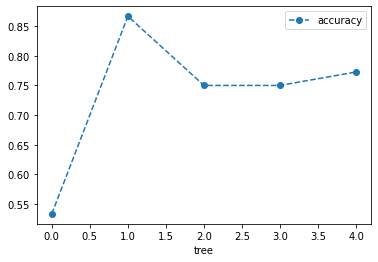

In [31]:
clf_dt= DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
# use 5-fold cross validation
scores= cross_val_score(clf_dt, X_train, y_train, cv=5)
df= pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--');

This graphs reveals that using different Training and Testing data with the _same_ `alpha` resulted ni different accuracies, suggesting that alpha is sensitive to the dataset itself. So, instead of picking a single Training and a single Testing Set, let's use __cross validation__ ot find the optimal value for `ccp_alpha`.

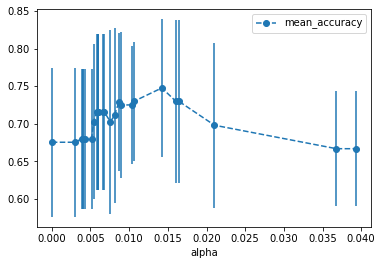

In [32]:
# create an array to store the results of each fold of cross validatio
alpha_loop_values= []
for ccp_alpha in ccp_alphas:
    clf_dt= DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores= cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results= pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--');

Employing cross validation, it can be shown that instead of setting `ccp_alpha=0.016`, we need to set it closer to __0.014__. We can find the exact value:

In [33]:
alpha_results[(alpha_results['alpha']>0.014)
             &
             (alpha_results['alpha']<0.016)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [34]:
ideal_ccp_alpha= alpha_results[(alpha_results['alpha']>0.014)
                            &
                             (alpha_results['alpha']<0.016)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

Store the ideal value for `alpha` as a float:

In [35]:
ideal_ccp_alpha= float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

## 7. Build and Draw Final Tree
The ideal value for `alpha` can now be used to build the final, prunned __Classification Tree__.

In [36]:
clf_dt_pruned= DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned= clf_dt_pruned.fit(X_train,y_train)

Again, draw a __Confusion Matrix__ to see if the prunned does better.

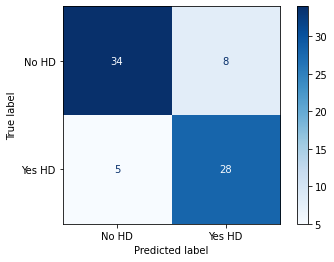

In [37]:
plot_confusion_matrix(clf_dt_pruned,
                     X_test,
                     y_test,
                     display_labels=['No HD','Yes HD'],
                     cmap=plt.cm.Blues);

Of the __34+8=42__ people that did not have heart disease, __34 (81%)__ were correctly classified. This is an improvement over the full-sized tree, which inly correcly classified __31 (74%)__ of the patients without heart disease. Of the __5+28=33__ people with heart disease, __28 (85%)__ were correctly classified. Again, this is an improvement over the full-sized tree, which only correctly predicted __26 (79%)__ the patients with heart disease.

__Interpreting the Decision Tree Graph:__

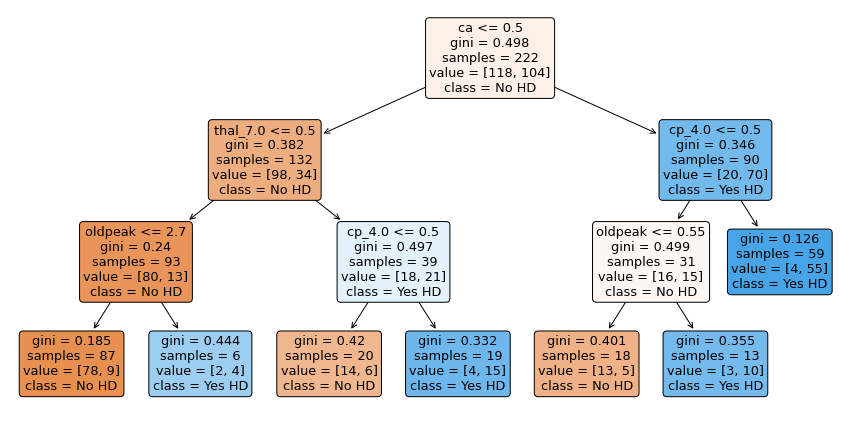

In [38]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=['No HD','Yes HD'],
         feature_names=X_encoded.columns);

Each node has:
* The variable (column name) and the threshold for splitting the observations. For example, in the tree's root, we use __ca__ to split the observations at a threshold value of __0.5__ All observations with __ca <= 0.5__ go to the __left__ and all observations with __ca > 0.5__ go to the __right__.
* __gini__ is the gini index or score for that node (defining purity of the sample)
* __samples__ tell us how many samples are in the node
* __value__ tells us how many samples in the node are in each category. In this example, we have two categories: __No__ and __Yes__, referring to whether or not a patient has heart disease. The number of patients with __No__ comes first. Thus, in the root, 118 patients have No and 104 have Yes.
* __class__ tells us whichever category is represented most in the node. In the root, the No's outwheigh the Yes's.

The leaves are just like nodes, except that they do not contain a variable and threshold for futher splitting.

Lastly, the nodes and leaves are colored by the __class__. In this case, __No__ is in different shades of orange and __Yes__ is different shades of blue. The darker the shade, the lower the __gini__ score, and that tells us how much the node or leave is skewed towards on class.